(RM02)=
# RM02

Consider the following constrained optimization problem:

$$
\begin{array}{lll}
\textrm{minimize}   & f(x_1, x_2)     &= ( x_1 - 1.25 )^2 + ( x_2 - 1 )^2 & \\
\textrm{subject to} & g_{1}(x_1, x_2) &= {x_1}^2 + {x_2}^2 - 1 &\leq 0, \\
                    & g_{2}(x_1, x_2) &= {x_2} - 0.25          &\leq 0, \\
                    & g_{3}(x_1, x_2) &= -{x_1} &\leq 0, \\
                    & g_{4}(x_1, x_2) &= -{x_2} &\leq 0, \\
\end{array}
$$

with

$$
\nabla     f(x_1, x_2) = \begin{pmatrix} 2(x_1 - 1.25) \\ 2(x_2 - 1) \end{pmatrix}, \quad
\nabla g_{1}(x_1, x_2) = \begin{pmatrix} 2 x_1 \\ 2 x_2 \end{pmatrix}, \quad
\nabla g_{2}(x_1, x_2) = \begin{pmatrix} 0 \\ 1 \end{pmatrix}.
$$

The optimal point is
$\begin{pmatrix} {x_1}^{*} \\ {x_2}^{*} \end{pmatrix}$
$= \frac{1}{4} \begin{pmatrix} \sqrt{15} \\ 1 \end{pmatrix}$
$\approx \begin{pmatrix} 0.97 \\ 0.25 \end{pmatrix}$
with $f({x_1}^{*}, {x_2}^{*}) \approx 0.64$ and
$\nabla f({x_1}^{*}, {x_2}^{*}) = \frac{1}{2} \begin{pmatrix} \sqrt{15} - 5 \\ -3 \end{pmatrix}$
$\approx \begin{pmatrix} -0.56 \\ -1.5 \end{pmatrix}$

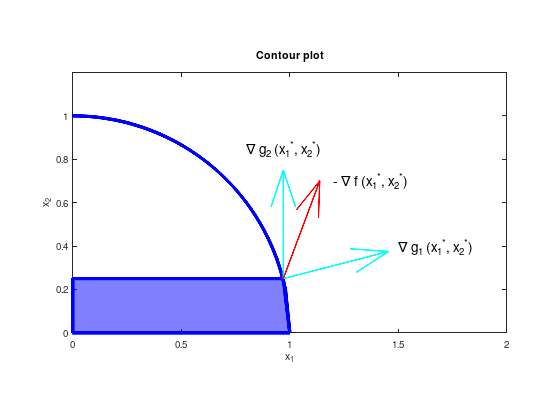

In [60]:
% Optimal point.
px = 0.97;
py = 0.25;

% Visualize constrained set of feasible solutions (blue).
area ([0 1 0.97 0 0], [0 0 1/4 1/4 0], ...
  'FaceColor', 'blue', ...
  'FaceAlpha', 0.5, ...
  'LineWidth', 4, ...
  'EdgeColor', 'blue');

% Visualize scaled gradients of objective function (red arrow)
% and constraint functions (cyan arrows).
hold on;
x = 0:0.02:1;
plot (x, sqrt (1 - x.^2), 'LineWidth', 4, 'b');
quiver (px, py, 0.5 * px,   0.5 * py,  'LineWidth', 2, 'c');
quiver (px, py, 0,          0.5,       'LineWidth', 2, 'c');
quiver (px, py, 0.3 * 0.56, 0.3 * 1.5, 'LineWidth', 2, 'r');
text (1.2, 0.70, '- \nabla f ({x_1}^{*}, {x_2}^{*})', 'FontSize', 14);
text (0.8, 0.85, '\nabla g_2 ({x_1}^{*}, {x_2}^{*})', 'FontSize', 14);
text (1.5, 0.40, '\nabla g_1 ({x_1}^{*}, {x_2}^{*})', 'FontSize', 14);
axis equal;
xlim ([0 2.0]);
ylim ([0 1.2]);
xlabel ('x_1');
ylabel ('x_2');
title ('Contour plot');

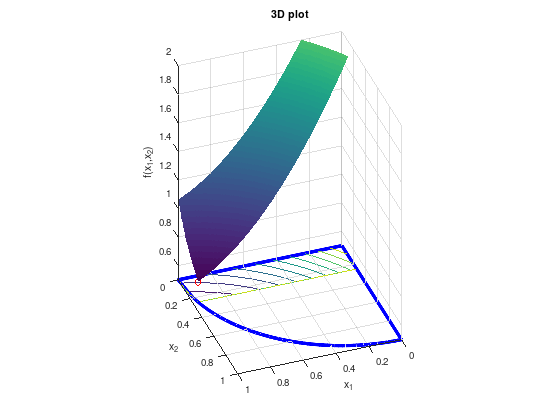

In [53]:
% Optimal point.
px = 0.97;
py = 0.25;

[X1, X2] = meshgrid (linspace (0, 1, 500));
FX = (X1 - 1.25).^2 + (X2 - 1).^2;

% Remove infeasible points.
FX((X1.^2 + X2.^2) > 1) = inf;
FX(X2 > 0.25) = inf;
surfc (X1, X2, FX);
shading flat;
hold on;
x = 0:0.02:1;
plot3 (x, sqrt (1 - x.^2), 0.5 .* ones (size (x)), 'LineWidth', 4, 'b');
plot3 ([1 0 0], [0 0 1], [0.5 0.5 0.5], 'LineWidth', 4, 'b');
plot3 (px, py, (px - 1.25)^2 + (py - 1)^2, 'ro');
xlabel ('x_1');
ylabel ('x_2');
zlabel ('f(x_1,x_2)');
title ('3D plot');
axis equal;
zlim ([0.5, 2]);
view (160, 35);

At the optimal point only the constraints $g_{1}$ and $g_{2}$ are active,
thus ${\lambda_3}^{*} = {\lambda_4}^{*} = 0$.

According to KKT,
there exist unique ${\lambda_1}^{*} \geq 0$, ${\lambda_2}^{*} \geq 0$ with

$$
\frac{1}{2} \begin{pmatrix} \sqrt{15} - 5 \\ -3 \end{pmatrix}
+ {\lambda_1}^{*} \frac{1}{2} \begin{pmatrix} \sqrt{15} \\ 1 \end{pmatrix}
+ {\lambda_2}^{*} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = 0
$$

thus ${\lambda_1}^{*} = \frac{1}{3} (\sqrt{15} - 3) \approx 0.29$
and ${\lambda_2}^{*} = \frac{12 - \sqrt{15}}{6} \approx 1.35$.

## Numerical experiment (only Matlab)

In [ ]:
function RM01 ()
  % Nonlinear objective function.
  fun = @(x) (x(1) - 1.25).^2 + (x(2) - 1).^2;

  % Starting point.
  x0 = [1, 0.25];

  % Linear inequality constraints A * x <= b.
  A = [];
  b = [];

  % Linear equality constraints Aeq * x = beq.
  Aeq = [];
  beq = [];

  % Bounds lb <= x <= ub
  lb = [0, 0];      % g_3 and g_4
  ub = [10, 0.25];  % g_2

  % Call solver.
  [x,fval,exitflag,output,lambda,grad,hessian] = fmincon (fun,x0,A,b,Aeq,beq,lb,ub,@nonlcon);
  
  % Display interesting details.
  
  exitflag  % == 1 success
  x         % optimal solution
  fval      % function value at optimal solution
  grad      % gradient of fun at optimal solution
  hessian   % Hessian matrix of fun at optimal solution
  lambda    % Lagrange parameter
  lambda.lower       % lambda_3 and lambda_4
  lambda.upper(2)    % lambda_2
  lambda.ineqnonlin  % lambda_1
end

% Nonlinear constraint function for g_1.
function [c,ceq] = nonlcon(x)
  c = x(1).^2 + x(2).^2 - 1;
  ceq = 0;
end